In [ ]:
#Importing of packages
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn.metrics import roc_auc_score,accuracy_score,classification_report,plot_confusion_matrix,roc_curve
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import label_binarize
import tensorflow as tf
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


In [ ]:
from itertools import combinations,product

In [ ]:
from google.colab import drive 
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
data=pd.read_csv('/gdrive/My Drive/data.csv',index_col=0).reset_index(drop=True)

In [ ]:
#Relabelling
def mapping(x):
  if x<18.5:
    return 'Low ESG Risk'
  elif x>=18.5 and x<23.5:
    return 'Medium ESG Risk'
  else:
    return 'High ESG Risk'

In [ ]:
#Don't Use for Kevin's New Model
data['ESG Risk Rating']=data['ESG Risk Score'].apply(lambda x:mapping(x))
data


,Companies,ESG Risk Score,ESG Risk Rating,Opportunities in Clean Tech Sentiment Score,Carbon Emissions Sentiment Score,Water Stress Sentiment Score,Electronic Waste Sentiment Score,Toxic Emissions & Waste Sentiment Score,Human Capital Development Sentiment Score,Privacy and Data Security Sentiment Score,Labor Management Sentiment Score,Governance Sentiment Score,Ticker,Market Capitalisation,Page Count,Sentence Count,Word Count
0,24SevenOffice Group,24.6,High ESG Risk,0.157118,0.000000,0.000000,0.000000,0.00000,0.022475,0.025926,0.073945,0.058063,719.F,0.000041,0.123596,0.055704,0.055670
1,"2U, Inc",19.8,Medium ESG Risk,0.042143,-0.051786,-0.051786,-0.051786,0.00000,0.104555,0.087348,0.005942,0.103705,TWOU,0.000428,0.106742,0.034621,0.035246
2,Absolute Software Corp,24.1,High ESG Risk,0.146875,0.300000,-0.081250,-0.081250,0.00000,0.000000,0.104861,0.159091,0.131834,ABST,0.000185,0.005618,0.004217,0.003077
3,Accenture,9.7,Low ESG Risk,0.134698,0.269143,0.000000,0.195731,0.00000,0.140023,0.094140,0.194040,0.187222,ACN,0.096018,0.042135,0.033289,0.030448
4,"ACI Worldwide, Inc",20.8,Medium ESG Risk,-0.013300,0.045833,0.173381,-0.016071,0.00000,0.125000,0.033903,0.084939,0.057903,ACIW,0.001358,0.109551,0.033289,0.031902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,Zensar Technologies Ltd,21.0,Medium ESG Risk,0.049878,0.072020,0.033828,0.055806,0.12585,0.117336,0.120367,0.067073,0.085035,ZENSARTECH.BO,0.000512,0.865169,0.575899,0.674938
399,"Ziff Davis, Inc",16.6,Low ESG Risk,0.127349,0.059974,-0.019757,0.090824,0.00000,0.135668,0.039777,0.100633,0.088434,ZD,0.002008,0.179775,0.092099,0.106231
400,Zillow Group Inc,24.2,High ESG Risk,0.032270,0.291865,-0.005227,0.000000,0.00000,0.186111,0.151992,0.148718,0.177035,Z,0.005333,0.061798,0.056591,0.052093
401,Zix Corp,24.3,High ESG Risk,0.216190,0.175179,0.075661,0.000000,0.00000,0.122424,0.087798,0.188427,0.107560,ZIXI,0.000289,0.022472,0.021749,0.018613


In [ ]:
#Visualise distribution of ESG Ratings
import plotly.express as px
freq_df=pd.DataFrame(data['ESG Risk Rating'].value_counts()).reset_index()
fig=px.bar(freq_df,x='index',y='ESG Risk Rating')
fig.show()

In [ ]:
#Split into 60% training,20% validation, 20% test
x_train,x_test,y_train,y_test=train_test_split(data.drop(columns=['ESG Risk Rating']),data['ESG Risk Rating'],test_size=0.4,random_state=123)
x_test,x_validation,y_test,y_validation=train_test_split(x_test,y_test,test_size=0.5,random_state=123)

In [ ]:
print(x_train.shape[0])
print(x_validation.shape[0])
print(x_test.shape[0])

241
81
81


In [ ]:
x_train

,Companies,ESG Risk Score,Opportunities in Clean Tech Sentiment Score,Carbon Emissions Sentiment Score,Water Stress Sentiment Score,Electronic Waste Sentiment Score,Toxic Emissions & Waste Sentiment Score,Human Capital Development Sentiment Score,Privacy and Data Security Sentiment Score,Labor Management Sentiment Score,Governance Sentiment Score,Ticker,Market Capitalisation,Page Count,Sentence Count,Word Count
80,CSAM Health Group,25.4,0.293087,0.000000,0.000000,0.000000,0.000000,0.072761,0.043733,0.072860,0.049137,CSAM.OL,0.000060,0.058989,0.047048,0.055385
117,"Forrester Research, Inc",24.0,-0.200000,0.183362,0.000000,0.000000,0.000000,0.000000,0.282589,0.151569,0.147436,FORR,0.000485,0.022472,0.010209,0.008563
156,International Business Machines Corp,14.8,0.101443,0.062407,0.054696,0.025895,0.016818,0.104728,0.135027,0.115986,0.094274,IBM,0.050885,0.134831,0.123169,0.108185
274,PayPal Holdings Inc,16.4,0.055717,0.056975,0.052083,0.023529,0.000000,0.058758,0.074580,0.066947,0.075975,PYPL,0.058407,0.146067,0.184199,0.182839
232,Neptune Co,26.4,0.070584,0.032281,0.001920,0.058528,0.200000,0.045085,0.078956,0.048670,0.058426,217270.KQ,0.000155,0.373596,0.442743,0.330730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,NEC Networks & System Integration Corp,18.0,0.086834,0.059160,0.049526,-0.018600,0.063995,0.055828,0.080192,0.084434,0.051722,1973.T,0.000923,0.320225,0.432091,0.459385
98,Equiniti Group,22.8,0.187706,0.074204,0.028889,0.092892,0.000000,0.098184,0.082155,0.056333,0.101823,EQN,0.053540,0.657303,0.571904,0.534188
322,Silverlake Axis Ltd,19.1,0.057011,0.050640,0.125000,0.058437,0.000000,0.085425,0.062820,0.034752,0.063430,5CP.SI,0.000284,0.662921,0.482468,0.599155
382,Vobile Group Ltd,26.2,0.142690,0.082967,0.014643,0.066810,0.032396,0.034071,0.157577,0.038994,0.066793,VOBIF,0.000518,0.030899,0.022193,0.020385


In [ ]:
x_validation

,Companies,ESG Risk Score,Opportunities in Clean Tech Sentiment Score,Carbon Emissions Sentiment Score,Water Stress Sentiment Score,Electronic Waste Sentiment Score,Toxic Emissions & Waste Sentiment Score,Human Capital Development Sentiment Score,Privacy and Data Security Sentiment Score,Labor Management Sentiment Score,Governance Sentiment Score,Ticker,Market Capitalisation,Page Count,Sentence Count,Word Count
389,WNS Holdings Ltd,24.1,0.125237,0.034925,0.142957,0.069375,-0.108750,0.113378,0.095554,0.094311,0.078931,WNS,0.001870,0.193820,0.121394,0.115385
22,Aspire Global,22.9,0.112170,0.102607,0.000000,-0.040278,0.083333,0.098393,0.157244,0.099766,0.105896,ASPIRE.ST,0.000237,0.112360,0.075233,0.077464
281,Progress Software Corp,20.0,0.125000,0.000000,0.000000,0.000000,0.000000,0.162500,0.217332,0.085759,0.200000,PRGS,0.000886,0.005618,0.003995,0.004603
343,"Take-Two Interactive Software, Inc",13.8,0.025206,0.006250,0.000000,-0.026637,0.000000,0.046961,0.040233,0.076613,0.059747,TTWO,0.007326,0.286517,0.312472,0.315168
285,PTC Inc,19.4,0.111412,0.050303,0.200000,0.083301,0.000000,0.004545,0.028118,0.130035,0.068518,PTC,0.005382,0.067416,0.038837,0.033526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,OTSUKA CORP,23.8,0.045397,0.012755,0.098981,0.001401,0.052346,0.080902,0.080742,0.074063,0.060080,OSUKF,0.002961,0.230337,0.380382,0.414641
373,Vakrangee Ltd,7.5,0.066117,0.000000,0.000000,0.111111,0.000000,0.047429,0.021810,0.132024,0.077097,VAKRANGEE.NS,0.000221,0.205056,0.015757,0.014906
338,"Sumo Logic, Inc",17.5,0.161553,0.078904,-0.042256,-0.049180,0.000000,0.062247,0.100414,0.127022,0.121329,SUMO,0.000548,0.050562,0.028850,0.025501
114,Fiverr International Ltd,22.8,0.145384,0.191132,0.013333,-0.007828,0.000000,0.038194,0.092727,0.106827,0.123070,FVRR,0.001121,0.098315,0.061917,0.054197


In [ ]:
#Remove the features company name and ESG Risk Score
x_train=x_train[list(filter(lambda x:x!='Ticker',x_train.columns.tolist()[2:]))]
x_test=x_test[list(filter(lambda x:x!='Ticker',x_test.columns.tolist()[2:]))]
x_validation=x_validation[list(filter(lambda x:x!='Ticker',x_validation.columns.tolist()[2:]))]

In [ ]:
x_validation

,Opportunities in Clean Tech Sentiment Score,Carbon Emissions Sentiment Score,Water Stress Sentiment Score,Electronic Waste Sentiment Score,Toxic Emissions & Waste Sentiment Score,Human Capital Development Sentiment Score,Privacy and Data Security Sentiment Score,Labor Management Sentiment Score,Governance Sentiment Score,Market Capitalisation,Page Count,Sentence Count,Word Count
389,0.125237,0.034925,0.142957,0.069375,-0.108750,0.113378,0.095554,0.094311,0.078931,0.001870,0.193820,0.121394,0.115385
22,0.112170,0.102607,0.000000,-0.040278,0.083333,0.098393,0.157244,0.099766,0.105896,0.000237,0.112360,0.075233,0.077464
281,0.125000,0.000000,0.000000,0.000000,0.000000,0.162500,0.217332,0.085759,0.200000,0.000886,0.005618,0.003995,0.004603
343,0.025206,0.006250,0.000000,-0.026637,0.000000,0.046961,0.040233,0.076613,0.059747,0.007326,0.286517,0.312472,0.315168
285,0.111412,0.050303,0.200000,0.083301,0.000000,0.004545,0.028118,0.130035,0.068518,0.005382,0.067416,0.038837,0.033526
...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,0.045397,0.012755,0.098981,0.001401,0.052346,0.080902,0.080742,0.074063,0.060080,0.002961,0.230337,0.380382,0.414641
373,0.066117,0.000000,0.000000,0.111111,0.000000,0.047429,0.021810,0.132024,0.077097,0.000221,0.205056,0.015757,0.014906
338,0.161553,0.078904,-0.042256,-0.049180,0.000000,0.062247,0.100414,0.127022,0.121329,0.000548,0.050562,0.028850,0.025501
114,0.145384,0.191132,0.013333,-0.007828,0.000000,0.038194,0.092727,0.106827,0.123070,0.001121,0.098315,0.061917,0.054197


In [ ]:
#Test all possible combinations of features to determine the one that performs best on validation data
accuracy_scores=[]
roc_scores_tree=[]
for i in range(2,len(x_train.columns.tolist())):
  for combi in list(combinations(x_train.columns.tolist(),i)):
     for num in list(product(['gini','entropy'],range(1,10))):
        decision_tree=DecisionTreeClassifier(criterion=num[0],max_depth=num[1])
        decision_tree.fit(x_train[list(combi)],y_train)
        acc=accuracy_score(y_validation,decision_tree.predict(x_validation[list(combi)]))
        roc=roc_auc_score(y_validation,decision_tree.predict_proba(x_validation[list(combi)]),multi_class='ovr',average="macro")
        accuracy_scores.append(((num[0],num[1]),combi,acc))
        roc_scores_tree.append(((num[0],num[1]),combi,roc))

In [ ]:
data_roc_scores_tree=pd.DataFrame(roc_scores_tree)
data_roc_scores_tree

,0,1,2
0,"(gini, 1)","(Opportunities in Clean Tech Sentiment Score, ...",0.489588
1,"(gini, 2)","(Opportunities in Clean Tech Sentiment Score, ...",0.540437
2,"(gini, 3)","(Opportunities in Clean Tech Sentiment Score, ...",0.513256
3,"(gini, 4)","(Opportunities in Clean Tech Sentiment Score, ...",0.506970
4,"(gini, 5)","(Opportunities in Clean Tech Sentiment Score, ...",0.486636
...,...,...,...
147181,"(entropy, 5)","(Carbon Emissions Sentiment Score, Water Stres...",0.614102
147182,"(entropy, 6)","(Carbon Emissions Sentiment Score, Water Stres...",0.631353
147183,"(entropy, 7)","(Carbon Emissions Sentiment Score, Water Stres...",0.605382
147184,"(entropy, 8)","(Carbon Emissions Sentiment Score, Water Stres...",0.616626


In [ ]:
#List Of accuracy scores for each combination of features
data_accuracy_scores_tree=pd.DataFrame(accuracy_scores)
data_accuracy_scores_tree

,0,1,2
0,"(gini, 1)","(Opportunities in Clean Tech Sentiment Score, ...",0.271605
1,"(gini, 2)","(Opportunities in Clean Tech Sentiment Score, ...",0.320988
2,"(gini, 3)","(Opportunities in Clean Tech Sentiment Score, ...",0.283951
3,"(gini, 4)","(Opportunities in Clean Tech Sentiment Score, ...",0.308642
4,"(gini, 5)","(Opportunities in Clean Tech Sentiment Score, ...",0.345679
...,...,...,...
147181,"(entropy, 5)","(Carbon Emissions Sentiment Score, Water Stres...",0.444444
147182,"(entropy, 6)","(Carbon Emissions Sentiment Score, Water Stres...",0.444444
147183,"(entropy, 7)","(Carbon Emissions Sentiment Score, Water Stres...",0.456790
147184,"(entropy, 8)","(Carbon Emissions Sentiment Score, Water Stres...",0.469136


In [ ]:
data_accuracy_scores_tree['Auc']=data_roc_scores_tree[2]
avg_tree=[]
for index,rows in data_accuracy_scores_tree.iterrows():
   avg_tree.append((rows[2]+rows['Auc'])/2)
avg_tree

[0.3805963086574267,
 0.4307120976838332,
 0.3986034940473432,
 0.40780577622104797,
 0.41615761503577,
 0.39566216064834125,
 0.3762017698627914,
 0.3944401228773621,
 0.38362199711444855,
 0.3805963086574267,
 0.4307120976838332,
 0.3960498462584403,
 0.40895883791854015,
 0.4061336677598541,
 0.4501602359817055,
 0.4142681124360698,
 0.3869419746326427,
 0.4036745391616063,
 0.3598987184018603,
 0.40238536017243776,
 0.39855761059348876,
 0.463843355506111,
 0.4575290993564487,
 0.419494311465721,
 0.4726244056034549,
 0.4760019879208579,
 0.42854425236406624,
 0.3598987184018603,
 0.40238536017243776,
 0.3975207966362274,
 0.4505149907677807,
 0.4700058618798189,
 0.3976527130749857,
 0.42840715728765894,
 0.45353898922650226,
 0.43242233974953254,
 0.3598987184018603,
 0.3834307134496824,
 0.3994314604289312,
 0.41937749636891797,
 0.4194383725219796,
 0.4129521107595915,
 0.4270769354826249,
 0.45751200623078236,
 0.44098241049769,
 0.3598987184018603,
 0.3834307134496824,
 0.401

In [ ]:
data_accuracy_scores_tree['Average']=avg_tree
data_accuracy_scores_tree['Number of features']=data_accuracy_scores_tree[1].apply(lambda x:len(x))
data_accuracy_scores_tree

,0,1,2,Auc,Average,Number of features
0,"(gini, 1)","(Opportunities in Clean Tech Sentiment Score, ...",0.271605,0.489588,0.380596,2
1,"(gini, 2)","(Opportunities in Clean Tech Sentiment Score, ...",0.320988,0.540437,0.430712,2
2,"(gini, 3)","(Opportunities in Clean Tech Sentiment Score, ...",0.283951,0.513256,0.398603,2
3,"(gini, 4)","(Opportunities in Clean Tech Sentiment Score, ...",0.308642,0.506970,0.407806,2
4,"(gini, 5)","(Opportunities in Clean Tech Sentiment Score, ...",0.345679,0.486636,0.416158,2
...,...,...,...,...,...,...
147181,"(entropy, 5)","(Carbon Emissions Sentiment Score, Water Stres...",0.444444,0.614102,0.529273,12
147182,"(entropy, 6)","(Carbon Emissions Sentiment Score, Water Stres...",0.444444,0.631353,0.537899,12
147183,"(entropy, 7)","(Carbon Emissions Sentiment Score, Water Stres...",0.456790,0.605382,0.531086,12
147184,"(entropy, 8)","(Carbon Emissions Sentiment Score, Water Stres...",0.469136,0.616626,0.542881,12


In [ ]:
data_accuracy_scores_tree=data_accuracy_scores_tree.sort_values(by='Average',ascending=False)
data_accuracy_scores_tree

,0,1,2,Auc,Average,Number of features
1336,"(gini, 5)","(Market Capitalisation, Word Count)",0.654321,0.745352,0.699837,2
1345,"(entropy, 5)","(Market Capitalisation, Word Count)",0.654321,0.739847,0.697084,2
5476,"(gini, 5)","(Toxic Emissions & Waste Sentiment Score, Mark...",0.641975,0.747749,0.694862,3
41260,"(gini, 5)","(Toxic Emissions & Waste Sentiment Score, Priv...",0.691358,0.681594,0.686476,5
63832,"(gini, 5)","(Carbon Emissions Sentiment Score, Toxic Emiss...",0.691358,0.681594,0.686476,6
...,...,...,...,...,...,...
7090,"(entropy, 8)","(Opportunities in Clean Tech Sentiment Score, ...",0.197531,0.412836,0.305183,4
34321,"(entropy, 5)","(Water Stress Sentiment Score, Electronic Wast...",0.197531,0.409285,0.303408,5
81854,"(gini, 9)","(Opportunities in Clean Tech Sentiment Score, ...",0.209877,0.392252,0.301064,7
8691,"(entropy, 7)","(Opportunities in Clean Tech Sentiment Score, ...",0.197531,0.404467,0.300999,4


In [ ]:
from google.colab import files
data_accuracy_scores_tree.to_csv('decision_tree.csv')
files.download('decision_tree.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                 precision    recall  f1-score   support

  High ESG Risk       0.41      0.42      0.42        26
   Low ESG Risk       0.54      0.67      0.60        21
Medium ESG Risk       0.54      0.44      0.48        34

       accuracy                           0.49        81
      macro avg       0.49      0.51      0.50        81
   weighted avg       0.50      0.49      0.49        81

accuracy score is 0.49382716049382713


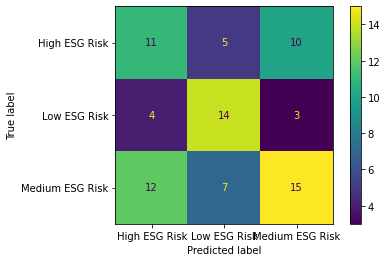

In [ ]:
decision_tree=DecisionTreeClassifier(criterion=data_accuracy_scores_tree.iloc[0][0][0],max_depth=data_accuracy_scores_tree.iloc[0][0][1])
decision_tree.fit(x_train[list(data_accuracy_scores_tree.iloc[0][1])],y_train)
plot_confusion_matrix(decision_tree,x_test[list(data_accuracy_scores_tree.iloc[0][1])],y_test)
print(classification_report(y_test,decision_tree.predict(x_test[list(data_accuracy_scores_tree.iloc[0][1])])))
print('accuracy score is {}'.format(accuracy_score(y_test,decision_tree.predict(x_test[list(data_accuracy_scores_tree.iloc[0][1])]))))

In [ ]:
accuracy_scores_logistic=[]
roc_scores_logit=[]
for i in range(2,len(x_train.columns.tolist())):
  for combi in list(combinations(x_train.columns.tolist(),i)):
        logit_classifier=LogisticRegression()
        logit_classifier.fit(x_train[list(combi)],y_train)
        acc=accuracy_score(y_validation,logit_classifier.predict(x_validation[list(combi)]))
        roc=roc_auc_score(y_validation,logit_classifier.predict_proba(x_validation[list(combi)]),multi_class='ovr',average="macro")
        accuracy_scores_logistic.append((combi,acc))
        roc_scores_logit.append((combi,roc))

In [ ]:
data_roc_scores_logit=pd.DataFrame(accuracy_scores_logistic)
data_roc_scores_logit['Roc']=pd.DataFrame(roc_scores_logit)[1]
avg_score_logit=[]
for index,rows in data_roc_scores_logit.iterrows():
  avg_score_logit.append((rows[1]+rows['Roc'])/2)
data_roc_scores_logit['Average']=avg_score_logit
data_roc_scores_logit['Number of features']=data_roc_scores_logit[0].apply(lambda x:len(x))
data_roc_scores_logit=data_roc_scores_logit.sort_values(by='Average',ascending=False)
data_roc_scores_logit



,0,1,Roc,Average,Number of features
3727,"(Water Stress Sentiment Score, Electronic Wast...",0.432099,0.631376,0.531737,6
1984,"(Water Stress Sentiment Score, Electronic Wast...",0.432099,0.629139,0.530619,5
1966,"(Water Stress Sentiment Score, Electronic Wast...",0.432099,0.622631,0.527365,5
843,"(Water Stress Sentiment Score, Privacy and Dat...",0.419753,0.634124,0.526938,4
238,"(Water Stress Sentiment Score, Market Capitali...",0.419753,0.632011,0.525882,3
...,...,...,...,...,...
314,"(Human Capital Development Sentiment Score, La...",0.419753,0.406155,0.412954,3
2576,"(Opportunities in Clean Tech Sentiment Score, ...",0.407407,0.418305,0.412856,6
534,"(Opportunities in Clean Tech Sentiment Score, ...",0.419753,0.399084,0.409419,4
117,"(Opportunities in Clean Tech Sentiment Score, ...",0.419753,0.398811,0.409282,3


In [ ]:
data_roc_scores_logit.to_csv('logistic_regression.csv')
files.download('logistic_regression.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                 precision    recall  f1-score   support

  High ESG Risk       0.00      0.00      0.00        26
   Low ESG Risk       0.22      0.19      0.21        21
Medium ESG Risk       0.46      0.85      0.60        34

       accuracy                           0.41        81
      macro avg       0.23      0.35      0.27        81
   weighted avg       0.25      0.41      0.30        81

accuracy score is 0.4074074074074074


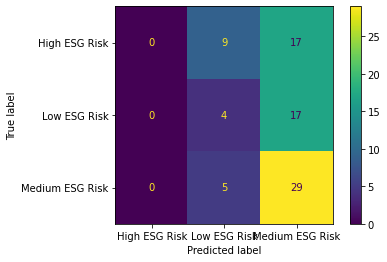

In [ ]:
logit=LogisticRegression()
logit.fit(x_train[list(data_roc_scores_logit.iloc[0][0])],y_train)
plot_confusion_matrix(logit,x_test[list(data_roc_scores_logit.iloc[0][0])],y_test)
print(classification_report(y_test,logit.predict(x_test[list(data_roc_scores_logit.iloc[0][0])])))
print('accuracy score is {}'.format(accuracy_score(y_test,logit.predict(x_test[list(data_roc_scores_logit.iloc[0][0])]))))

In [ ]:
accuracy_scores_svm=[]
roc_scores_svm=[]
for i in range(2,len(x_train.columns.tolist())):
  for combi in list(combinations(x_train.columns.tolist(),i)):
      for kernels in ['rbf','poly']:
        svm_classifier=SVC(kernel=kernels,probability=True)
        svm_classifier.fit(x_train[list(combi)],y_train)
        acc=accuracy_score(y_validation,svm_classifier.predict(x_validation[list(combi)]))
        roc=roc_auc_score(y_validation,svm_classifier.predict_proba(x_validation[list(combi)]),multi_class='ovr',average="macro")
        accuracy_scores_svm.append((kernels,combi,acc))
        roc_scores_svm.append((kernels,combi,roc))

In [ ]:
roc_scores_svm=[]
for i in range(2,len(x_train.columns.tolist())):
  for combi in list(combinations(x_train.columns.tolist(),i)):
        for kernels in ['rbf','poly']:
          svm_classifier=SVC(kernel=kernels,probability=True)
          svm_classifier.fit(x_train[list(combi)],y_train)
          acc=roc_auc_score(y_validation,svm_classifier.predict_proba(x_validation[list(combi)]),multi_class='ovr',average="macro")
          roc_scores_svm.append((kernels,combi,acc))

In [ ]:
data_roc_scores_svm=pd.DataFrame(accuracy_scores_svm)
data_roc_scores_svm['Roc']=pd.DataFrame(roc_scores_svm)[2]
avg_score_svm=[]
for index,rows in data_roc_scores_svm.iterrows():
   avg_score_svm.append((rows[2]+rows['Roc'])/2)
data_roc_scores_svm['Average']=avg_score_svm
data_roc_scores_svm=data_roc_scores_svm.sort_values(by='Average',ascending=False)
data_roc_scores_svm['Number of features']=data_roc_scores_svm[1].apply(lambda x:len(x))
data_roc_scores_svm

,0,1,2,Roc,Average,Number of features
10598,rbf,"(Carbon Emissions Sentiment Score, Electronic ...",0.530864,0.669178,0.600021,7
12728,rbf,"(Opportunities in Clean Tech Sentiment Score, ...",0.543210,0.656515,0.599862,8
14932,rbf,"(Opportunities in Clean Tech Sentiment Score, ...",0.543210,0.643602,0.593406,9
6800,rbf,"(Carbon Emissions Sentiment Score, Electronic ...",0.530864,0.652971,0.591917,6
10596,rbf,"(Carbon Emissions Sentiment Score, Electronic ...",0.506173,0.673139,0.589656,7
...,...,...,...,...,...,...
506,rbf,"(Electronic Waste Sentiment Score, Human Capit...",0.308642,0.392846,0.350744,3
8262,rbf,"(Opportunities in Clean Tech Sentiment Score, ...",0.283951,0.416470,0.350210,7
3906,rbf,"(Water Stress Sentiment Score, Electronic Wast...",0.259259,0.440817,0.350038,5
5490,rbf,"(Opportunities in Clean Tech Sentiment Score, ...",0.283951,0.415673,0.349812,6


In [ ]:
data_roc_scores_svm.to_csv('svm.csv')
files.download('svm.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                 precision    recall  f1-score   support

  High ESG Risk       0.47      0.27      0.34        26
   Low ESG Risk       0.40      0.10      0.15        21
Medium ESG Risk       0.44      0.79      0.57        34

       accuracy                           0.44        81
      macro avg       0.44      0.39      0.35        81
   weighted avg       0.44      0.44      0.39        81

accuracy score is 0.4444444444444444


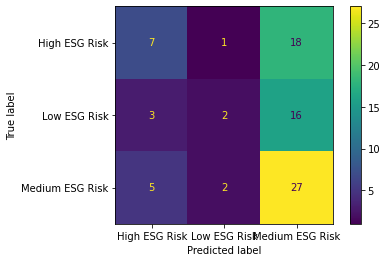

In [ ]:

svm=SVC(kernel=data_roc_scores_svm.iloc[0][0],probability=True)
svm.fit(x_train[list(data_roc_scores_svm.iloc[0][1])],y_train)
plot_confusion_matrix(svm,x_test[list(data_roc_scores_svm.iloc[0][1])],y_test)
print(classification_report(y_test,svm.predict(x_test[list(data_roc_scores_svm.iloc[0][1])])))
print('accuracy score is {}'.format(accuracy_score(y_test,svm.predict(x_test[list(data_roc_scores_svm.iloc[0][1])]))))

In [ ]:
accuracy_scores_random_forest=[]
roc_scores_random_forest=[]
for i in range(2,len(x_train.columns.tolist())):
  for combi in list(combinations(x_train.columns.tolist(),i)):
        rf_classifier=ensemble.RandomForestClassifier()
        rf_classifier.fit(x_train[list(combi)],y_train)
        acc=accuracy_score(y_validation,rf_classifier.predict(x_validation[list(combi)]))
        roc=roc_auc_score(y_validation,rf_classifier.predict_proba(x_validation[list(combi)]),multi_class='ovr',average="macro")
        accuracy_scores_random_forest.append((combi,acc))
        roc_scores_random_forest.append((combi,roc))

In [ ]:
roc_scores_random_forest=[]
for i in range(2,len(x_train.columns.tolist())):
  for combi in list(combinations(x_train.columns.tolist(),i)):
          rf_classifier=ensemble.RandomForestClassifier()
          rf_classifier.fit(x_train[list(combi)],y_train)
          acc=roc_auc_score(y_validation,rf_classifier.predict_proba(x_validation[list(combi)]),multi_class='ovr',average="macro")
          roc_scores_random_forest.append((combi,acc))

In [ ]:
data_roc_scores_rf=pd.DataFrame(accuracy_scores_random_forest)
data_roc_scores_rf['Roc']=pd.DataFrame(roc_scores_random_forest)[1]
avg_score_rf=[]
for index,rows in data_roc_scores_rf.iterrows():
  avg_score_rf.append((rows[1]+rows['Roc'])/2)
data_roc_scores_rf['Average']=avg_score_rf
data_roc_scores_rf['Number of features']=data_roc_scores_rf[0].apply(lambda x:len(x))
data_roc_scores_rf=data_roc_scores_rf.sort_values(by='Average',ascending=False)
data_roc_scores_rf

,0,1,Roc,Average,Number of features
6230,"(Opportunities in Clean Tech Sentiment Score, ...",0.617284,0.710081,0.663682,8
5986,"(Opportunities in Clean Tech Sentiment Score, ...",0.617284,0.693137,0.655211,8
8131,"(Opportunities in Clean Tech Sentiment Score, ...",0.617284,0.686778,0.652031,11
6666,"(Carbon Emissions Sentiment Score, Water Stres...",0.604938,0.694883,0.649911,8
8135,"(Opportunities in Clean Tech Sentiment Score, ...",0.592593,0.703970,0.648281,11
...,...,...,...,...,...
81,"(Opportunities in Clean Tech Sentiment Score, ...",0.283951,0.459096,0.371523,3
465,"(Opportunities in Clean Tech Sentiment Score, ...",0.271605,0.467381,0.369493,4
449,"(Opportunities in Clean Tech Sentiment Score, ...",0.259259,0.463889,0.361574,4
3,"(Opportunities in Clean Tech Sentiment Score, ...",0.246914,0.440827,0.343870,2


In [ ]:
data_roc_scores_rf.to_csv('random_forest.csv')
files.download('random_forest.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                 precision    recall  f1-score   support

  High ESG Risk       0.50      0.27      0.35        26
   Low ESG Risk       0.58      0.67      0.62        21
Medium ESG Risk       0.51      0.65      0.57        34

       accuracy                           0.53        81
      macro avg       0.53      0.53      0.51        81
   weighted avg       0.53      0.53      0.51        81

accuracy score is 0.5308641975308642


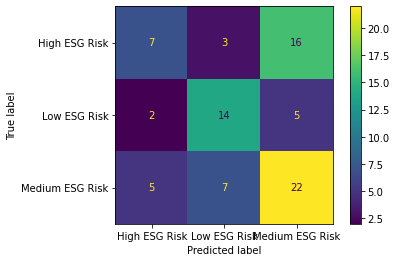

In [ ]:
random_forest=ensemble.RandomForestClassifier()
random_forest.fit(x_train[list(data_roc_scores_rf.iloc[0][0])],y_train)
plot_confusion_matrix(random_forest,x_test[list(data_roc_scores_rf.iloc[0][0])],y_test)
print(classification_report(y_test,random_forest.predict(x_test[list(data_roc_scores_rf.iloc[0][0])])))
print('accuracy score is {}'.format(accuracy_score(y_test,random_forest.predict(x_test[list(data_roc_scores_rf.iloc[0][0])]))))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
accuracy_scores_neighbors=[]
roc_scores_neighbors=[]
for i in range(2,len(x_train.columns.tolist())):
  for combi in list(combinations(x_train.columns.tolist(),i)):
     for num in range(5,20):
        neighbors_classifier=KNeighborsClassifier(n_neighbors=num)
        neighbors_classifier.fit(x_train[list(combi)],y_train)
        acc=accuracy_score(y_validation,neighbors_classifier.predict(x_validation[list(combi)]))
        roc=roc_auc_score(y_validation,neighbors_classifier.predict_proba(x_validation[list(combi)]),multi_class='ovr',average="macro")
        accuracy_scores_neighbors.append((num,combi,acc))
        roc_scores_neighbors.append((num,combi,roc))

In [ ]:
data_roc_scores_neighbors=pd.DataFrame(accuracy_scores_neighbors)
data_roc_scores_neighbors['Roc']=pd.DataFrame(roc_scores_neighbors)[2]
avg_score_neighbors=[]
for index,rows in data_roc_scores_neighbors.iterrows():
  avg_score_neighbors.append((rows[1]+rows['Roc'])/2)
data_roc_scores_neighbors['Average']=avg_score_neighbors
data_roc_scores_neighbors['Number of features']=data_roc_scores_neighbors[1].apply(lambda x:len(x))
data_roc_scores_neighbors=data_roc_scores_neighbors.sort_values(by='Average',ascending=False)
data_roc_scores_neighbors

In [ ]:
data_roc_scores_neighbors.to_csv('K Neighbors.csv')
files.download('K Neighbors.csv')

                 precision    recall  f1-score   support

  High ESG Risk       0.00      0.00      0.00         3
   Low ESG Risk       0.39      0.47      0.42        30
Medium ESG Risk       0.60      0.56      0.58        48

       accuracy                           0.51        81
      macro avg       0.33      0.34      0.33        81
   weighted avg       0.50      0.51      0.50        81

accuracy score is 0.5061728395061729


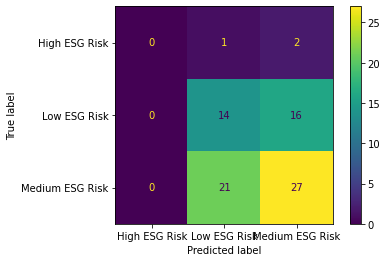

In [ ]:
k_neighbors=KNeighborsClassifier(n_neighbors=data_roc_scores_neighbors.iloc[0][0])
k_neighbors.fit(x_train[list(data_roc_scores_neighbors.iloc[0][1])],y_train)
plot_confusion_matrix(k_neighbors,x_test[list(data_roc_scores_neighbors.iloc[0][1])],y_test)
print(classification_report(y_test,k_neighbors.predict(x_test[list(data_roc_scores_neighbors.iloc[0][1])])))
print('accuracy score is {}'.format(accuracy_score(y_test,k_neighbors.predict(x_test[list(data_roc_scores_neighbors.iloc[0][1])]))))

In [ ]:
accuracy_scores_extra_tree=[]
roc_scores_extra_tree=[]
for i in range(2,len(x_train.columns.tolist())):
  for combi in list(combinations(x_train.columns.tolist(),i)):
        et_classifier=ensemble.ExtraTreesClassifier()
        et_classifier.fit(x_train[list(combi)],y_train)
        acc=accuracy_score(y_validation,et_classifier.predict(x_validation[list(combi)]))
        roc=roc_auc_score(y_validation,et_classifier.predict_proba(x_validation[list(combi)]),multi_class='ovr',average="macro")
        accuracy_scores_extra_tree.append((combi,acc))
        roc_scores_extra_tree.append((combi,roc))

In [ ]:
data_roc_scores_extra_tree=pd.DataFrame(accuracy_scores_extra_tree)
data_roc_scores_extra_tree['Roc']=pd.DataFrame(roc_scores_extra_tree)[1]
avg_score_neighbors=[]
for index,rows in data_roc_scores_neighbors.iterrows():
  avg_score_neighbors.append((rows[1]+rows['Roc'])/2)
data_roc_scores_neighbors['Average']=avg_score_neighbors
data_roc_scores_neighbors['Number of features']=data_roc_scores_extra_tree[0].apply(lambda x:len(x))
data_roc_scores_extra_tree=data_roc_scores_extra_tree.sort_values(by='Average',ascending=False)
data_roc_scores_extra_tree

                 precision    recall  f1-score   support

  High ESG Risk       0.00      0.00      0.00         3
   Low ESG Risk       0.58      0.73      0.65        30
Medium ESG Risk       0.77      0.69      0.73        48

       accuracy                           0.68        81
      macro avg       0.45      0.47      0.46        81
   weighted avg       0.67      0.68      0.67        81

accuracy score is 0.6790123456790124


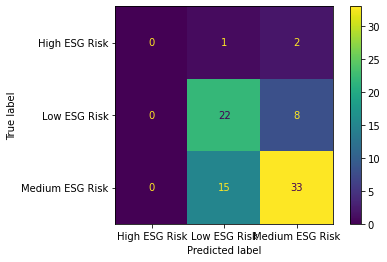

In [ ]:
extra_tree=ensemble.ExtraTreesClassifier()
extra_tree.fit(x_train[list(data_roc_scores_extra_tree.iloc[0][0])],y_train)
plot_confusion_matrix(extra_tree,x_test[list(data_roc_scores_extra_tree.iloc[0][0])],y_test)
print(classification_report(y_test,extra_tree.predict(x_test[list(data_roc_scores_extra_tree.iloc[0][0])])))
print('accuracy score is {}'.format(accuracy_score(y_test,extra_tree.predict(x_test[list(data_roc_scores_extra_tree.iloc[0][0])]))))

In [ ]:
data_roc_scores_extra_tree.to_csv('extra_tree.csv')
files.download('extra_tree.csv')

In [ ]:
accuracy_scores_gb=[]
roc_scores_gb=[]
for i in range(2,len(x_train.columns.tolist())):
  for combi in list(combinations(x_train.columns.tolist(),i)):
        gb_classifier=ensemble.GradientBoostingClassifier()
        gb_classifier.fit(x_train[list(combi)],y_train)
        acc=accuracy_score(y_validation,gb_classifier.predict(x_validation[list(combi)]))
        roc=roc_auc_score(y_validation,gb_classifier.predict_proba(x_validation[list(combi)]),multi_class='ovr',average="macro")
        accuracy_scores_gb.append((combi,acc))
        roc_scores_gb.append((combi,roc))

In [ ]:
data_roc_scores_gb=pd.DataFrame(accuracy_scores_gb)
data_roc_scores_gb['Roc']=pd.DataFrame(roc_scores_gb)[1]
avg_score_gb=[]
for index,rows in data_roc_scores_neighbors.iterrows():
  avg_score_gb.append((rows[1]+rows['Roc'])/2)
data_roc_scores_gb['Average']=avg_score_gb
data_roc_scores_gb['Number of features']=data_roc_scores_gb[0].apply(lambda x:len(x))
data_roc_scores_gb=data_roc_scores_gb.sort_values(by='Average',ascending=False)
data_roc_scores_gb

In [ ]:
data_roc_scores_gb.to_csv('gradient_boosting.csv')
files.download('gradient_boosting.csv')

                     precision    recall  f1-score   support

      High ESG Risk       0.00      0.00      0.00         0
       Low ESG Risk       0.53      0.48      0.51        33
    Medium ESG Risk       0.68      0.65      0.67        49
Negligible ESG Risk       0.00      0.00      0.00         0

           accuracy                           0.59        82
          macro avg       0.30      0.28      0.29        82
       weighted avg       0.62      0.59      0.60        82

accuracy score is 0.5853658536585366


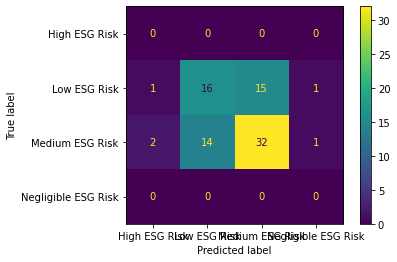

In [ ]:
#Gradient Boosting
adaboost=ensemble.GradientBoostingClassifier()
adaboost.fit(x_train[list(data_roc_scores_gb.iloc[0][0])],y_train)
adaboost.predict(x_validation[list(data_roc_scores_gb.iloc[0][0])])
plot_confusion_matrix(adaboost,x_validation[list(data_roc_scores_gb.iloc[0][0])],y_validation)
print(classification_report(y_validation,adaboost.predict(x_validation[list(data_roc_scores_gb.iloc[0][0])])))
print('accuracy score is {}'.format(accuracy_score(y_validation,adaboost.predict(x_validation[list(data_roc_scores_gb.iloc[0][0])]))))